### This is a test notebook

In [36]:
import numpy as np
import data_loader
import pandas as pd
import importlib
import matplotlib.pyplot as plt
import seaborn as sns
import neural_network
import helpers
import data_loader

In [6]:
importlib.reload(neural_network)
importlib.reload(helpers)
importlib.reload(data_loader)

inputSize = 28 * 28
outputSize = 10
minWeight = -0.0001
maxWeight = 0.0001
batchSize = 20
desiredError = 0.01
maxEpoch = 100
minDiff = 0.00001
alphas = [0.0001, 0.001, 0.01, 0.1]
layerSizes = [1, 50, 100, 500]

inputs = data_loader.loadTrainInputs('../')
labels = data_loader.loadTrainOutputs('../')

results = []
for layerSize in layerSizes:
    for alpha in alphas:

        avgLosses = []
        avgEpochs = []
        avgAcc = []
        for i in range(10):
            network = neural_network.NeuralNetwork(
                layerSize, inputSize, outputSize, minWeight, maxWeight, minWeight, maxWeight,
                helpers.relu
            )
            (epoch, accuracy) = neural_network.teachNeuralNetworkWithInput(
                network, batchSize, alpha, desiredError, maxEpoch, 10000, minDiff, inputs,
                labels
            )
            print('i: ', i)
            print(
                layerSize, alpha, epoch, accuracy
            )
            avgAcc.append(accuracy)
            avgEpochs.append(epoch)

        epoch = np.average(avgEpochs)
        accuracy = np.average(avgAcc)
        
        result = (layerSize, alpha, epoch, accuracy)
        results.append(result)
        
        with open('exp1.txt', 'a') as fp:
            fp.write('{}'.format(result) + '\n')
        print(result)



:  61
Correct:  8563 / 10000
Error:  0.048818227395811306
Epoch:  62
Correct:  8565 / 10000
Error:  0.04864226681818211
Epoch:  63
Correct:  8577 / 10000
Error:  0.04845304230955172
Epoch:  64
Correct:  8584 / 10000
Error:  0.04828350982458524
Epoch:  65
Correct:  8599 / 10000
Error:  0.04805596948995369
Epoch:  66
Correct:  8609 / 10000
Error:  0.04781499420598605
Epoch:  67
Correct:  8614 / 10000
Error:  0.04759464749695627
Epoch:  68
Correct:  8620 / 10000
Error:  0.047411110167279384
Epoch:  69
Correct:  8619 / 10000
Error:  0.047308768060681836
Epoch:  70
Correct:  8620 / 10000
Error:  0.047240777949688686
Epoch:  71
Correct:  8629 / 10000
Error:  0.04715213592639432
Epoch:  72
Correct:  8633 / 10000
Error:  0.046968758544473556
Epoch:  73
Correct:  8638 / 10000
Error:  0.04681736702278472
Epoch:  74
Correct:  8636 / 10000
Error:  0.046714717759868796
Epoch:  75
Correct:  8642 / 10000
Error:  0.04664341598753915
Epoch:  76
Correct:  8649 / 10000
Error:  0.04653864955352425
Epoch: 

ValueError: Could not interpret value `error` for parameter `y`

    layerSize  learningRate  epoch  accuracy
0         1.0        0.0001    5.0    0.1009
1         1.0        0.0010    5.0    0.1064
2         1.0        0.0100  100.0    0.2054
3         1.0        0.1000  100.0    0.2125
4        50.0        0.0001    5.0    0.1474
5        50.0        0.0010  100.0    0.6331
6        50.0        0.0100  100.0    0.8322
7        50.0        0.1000   43.0    0.8590
8       100.0        0.0001    5.0    0.2077
9       100.0        0.0010  100.0    0.7257
10      100.0        0.0100  100.0    0.8676
11      100.0        0.1000  100.0    0.9011
12      500.0        0.0001    5.0    0.3231
13      500.0        0.0010  100.0    0.9096
14      500.0        0.0100   49.0    0.9431
15      500.0        0.1000   23.0    0.9541


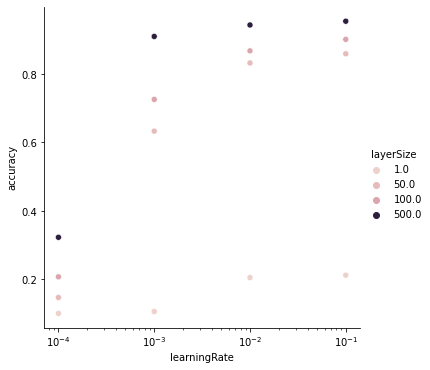

In [28]:
with open('exp1.txt', 'r') as file:
    lines = file.readlines()
    lines = [
        line.strip().replace('(', '').replace(')', '').split(', ') 
        for line in lines
    ]
    results = [tuple([float(s) for s in line]) for line in lines]
    frame = pd.DataFrame(results, columns=[
        'layerSize', 'learningRate', 'epoch', 'accuracy'
    ])
    print(frame)

    plot = sns.relplot(data=frame, x='learningRate', y='accuracy', hue='layerSize')
    plot.set(xscale = 'log')

In [30]:
importlib.reload(neural_network)
importlib.reload(helpers)
importlib.reload(data_loader)

inputSize = 28 * 28
outputSize = 10
minWeights = [-0.0001, -0.001, -0.01, -0.1]
maxWeights = [0.0001, 0.001, 0.01, 0.1]
batchSizes = [1, 20, 64, 128, 512]
desiredError = 0.01
maxEpoch = 100
minDiff = 0.00001
alpha = 0.1
layerSize = 100

inputs = data_loader.loadTrainInputs('../')
labels = data_loader.loadTrainOutputs('../')

results = []
for batchSize in batchSizes:
    for minWeight, maxWeight in zip(minWeights, maxWeights):

        avgLosses = []
        avgEpochs = []
        avgAcc = []
        for i in range(10):
            network = neural_network.NeuralNetwork(
                layerSize, inputSize, outputSize, minWeight, maxWeight, minWeight, maxWeight,
                helpers.relu
            )
            (epoch, accuracy) = neural_network.teachNeuralNetworkWithInput(
                network, batchSize, alpha, desiredError, maxEpoch, 10000, minDiff, inputs,
                labels
            )
            print('i: ', i)
            print(
                batchSize, minWeight, maxWeight, epoch, accuracy
            )
            avgAcc.append(accuracy)
            avgEpochs.append(epoch)

        epoch = np.average(avgEpochs)
        accuracy = np.average(avgAcc)
        
        result = (batchSize, minWeight, maxWeight, epoch, accuracy)
        results.append(result)
        
        with open('exp2.txt', 'a') as fp:
            fp.write('{}'.format(result) + '\n')
        print(result)



r:  0.06329042840271953
Epoch:  83
Correct:  8017 / 10000
Error:  0.06298403987200599
Epoch:  84
Correct:  8030 / 10000
Error:  0.0626966544947046
Epoch:  85
Correct:  8041 / 10000
Error:  0.062418228995097066
Epoch:  86
Correct:  8056 / 10000
Error:  0.06215778563231258
Epoch:  87
Correct:  8059 / 10000
Error:  0.06189703892155409
Epoch:  88
Correct:  8065 / 10000
Error:  0.061625186897429705
Epoch:  89
Correct:  8068 / 10000
Error:  0.06135567563049369
Epoch:  90
Correct:  8071 / 10000
Error:  0.06109705027235244
Epoch:  91
Correct:  8079 / 10000
Error:  0.060824716673257076
Epoch:  92
Correct:  8062 / 10000
Error:  0.06055289485338494
Epoch:  93
Correct:  8079 / 10000
Error:  0.0602866675823263
Epoch:  94
Correct:  8104 / 10000
Error:  0.06003011656108785
Epoch:  95
Correct:  8107 / 10000
Error:  0.05980551471332788
Epoch:  96
Correct:  8121 / 10000
Error:  0.05958449634245204
Epoch:  97
Correct:  8138 / 10000
Error:  0.05935951095723472
Epoch:  98
Correct:  8154 / 10000
Error:  0.0

    batchSize            weights  epoch  accuracy
0         1.0  (-0.0001, 0.0001)   28.0    0.9494
1         1.0    (-0.001, 0.001)   71.0    0.9511
2         1.0      (-0.01, 0.01)   46.0    0.9498
3         1.0        (-0.1, 0.1)   31.0    0.9486
4        20.0  (-0.0001, 0.0001)   84.0    0.8978
5        20.0    (-0.001, 0.001)  100.0    0.8998
6        20.0      (-0.01, 0.01)  100.0    0.9064
7        20.0        (-0.1, 0.1)   88.0    0.9155
8        64.0  (-0.0001, 0.0001)   80.0    0.8877
9        64.0    (-0.001, 0.001)   83.0    0.8859
10       64.0      (-0.01, 0.01)   93.0    0.8870
11       64.0        (-0.1, 0.1)  100.0    0.9119
12      128.0  (-0.0001, 0.0001)  100.0    0.8771
13      128.0    (-0.001, 0.001)   65.0    0.8710
14      128.0      (-0.01, 0.01)  100.0    0.8838
15      128.0        (-0.1, 0.1)  100.0    0.9017
16      512.0  (-0.0001, 0.0001)  100.0    0.8184
17      512.0    (-0.001, 0.001)  100.0    0.8271
18      512.0      (-0.01, 0.01)  100.0    0.8305


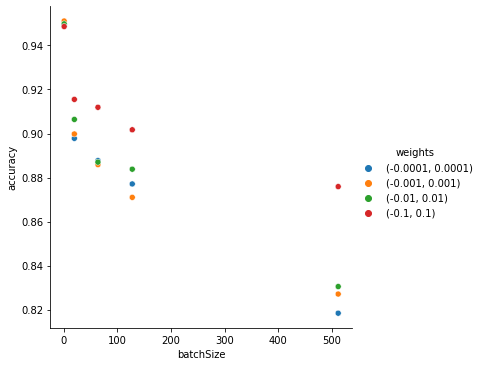

In [33]:
with open('exp2.txt', 'r') as file:
    lines = file.readlines()
    lines = [
        line.strip().replace('(', '').replace(')', '').split(', ') 
        for line in lines
    ]
    results = [[float(s) for s in line] for line in lines]
    results = [[line[0]] + [tuple(line[1:3])] + line[3:5] for line in results]
    results = [tuple(line) for line in results]
    frame = pd.DataFrame(results, columns=[
        'batchSize', 'weights', 'epoch', 'accuracy'
    ])
    print(frame)

    plot = sns.relplot(data=frame, x='batchSize', y='accuracy', hue='weights')
    # plot.set(xscale = 'log')

In [42]:
importlib.reload(neural_network)
importlib.reload(helpers)
importlib.reload(data_loader)

inputSize = 28 * 28
outputSize = 10
minWeights = -0.1
maxWeights = 0.1
batchSizes = 20
desiredError = 0.01
maxEpoch = 500
minDiff = 0.00001
alpha = 0.1
layerSize = 200
trainSizes = [40000, 50000]

inputs = data_loader.loadTrainInputs('../')
labels = data_loader.loadTrainOutputs('../')

results = []
for trainSize in trainSizes:
    avgLosses = []
    avgEpochs = []
    avgAcc = []
    for i in range(10):
        network = neural_network.NeuralNetwork(
            layerSize, inputSize, outputSize, minWeight, maxWeight, minWeight, maxWeight,
            helpers.relu
        )
        (epoch, accuracy) = neural_network.teachNeuralNetworkWithInput(
            network, batchSize, alpha, desiredError, maxEpoch, 10000, minDiff, inputs,
            labels, trainSize = trainSize
        )
        print('i: ', i)
        print(
            trainSize, epoch, accuracy
        )
        avgAcc.append(accuracy)
        avgEpochs.append(epoch)

    epoch = np.average(avgEpochs)
    accuracy = np.average(avgAcc)
    
    result = (trainSize, epoch, accuracy)
    results.append(result)
    
    with open('exp3.txt', 'a') as fp:
        fp.write('{}'.format(result) + '\n')
    print(result)


ect:  9197 / 10000
Error:  0.028108232033521013
Epoch:  90
Correct:  9204 / 10000
Error:  0.02800658094318516
Epoch:  91
Correct:  9211 / 10000
Error:  0.02791203228122855
Epoch:  92
Correct:  9212 / 10000
Error:  0.027827544976298184
Epoch:  93
Correct:  9218 / 10000
Error:  0.02775210820622625
Epoch:  94
Correct:  9215 / 10000
Error:  0.027681344861719453
Epoch:  95
Correct:  9214 / 10000
Error:  0.02760961827202576
Epoch:  96
Correct:  9209 / 10000
Error:  0.027527931633421637
Epoch:  97
Correct:  9211 / 10000
Error:  0.027455562640236277
Epoch:  98
Correct:  9220 / 10000
Error:  0.027374003496739924
Epoch:  99
Correct:  9222 / 10000
Error:  0.027296589189137188
Epoch:  100
Correct:  9225 / 10000
Error:  0.02721648110800238
Epoch:  101
Correct:  9229 / 10000
Error:  0.02713431413234234
Epoch:  102
Correct:  9228 / 10000
Error:  0.0270499739469503
Epoch:  103
Correct:  9227 / 10000
Error:  0.026968871227015474
Epoch:  104
Correct:  9231 / 10000
Error:  0.026901585823219894
Epoch:  10